***Data Source2: [Yelp](https://www.yelp.com/developers/documentation/v3/get_started) API***

***Data Source3:  [CityBikes](https://citybik.es/) API***

In [1]:
#imports
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

***Note:*** We believe that data from the YELP API is more reliable so we go with Yelp Datasets and also here as well our city of interest is ***Paris***

In [2]:
#part1
networks=pd.read_csv('../data/networks.csv')
bike_stations=pd.read_csv("../data/paris_stations.csv")

#part2
yelp_places=pd.read_csv('../data/yelp_places.csv')
yelp_category=pd.read_csv('../data/yelp_category.csv')

In [3]:
#  Let have a quick view of all the four dataframes

In [4]:
# DataFrame 1
city_networks=networks[networks['city'].str.contains('Paris'.strip(),case=False)]
city_networks

network_id               network_name          city country  \
34                velib           Vélib' Métropole         Paris      FR   
427  saclay-captainbike  Saclay VLS (Captain Bike)  Paris-Saclay      FR   

     ebikes  
34     True  
427    True

In [5]:
# DataFrame 2
bike_stations.head()

station_id                             station  \
0  78ec9186acd18a0b30bd3156d24b9f8d       Benjamin Godard - Victor Hugo   
1  43c856353b954711f2bbee185a1f9d04  André Mazet - Saint-André des Arts   
2  9b2700f3b19beb1dd9df2fd6a013789f     Faubourg Du Temple - Republique   
3  80778031e1a033712bfc3a27a190d5dd              Beaux-Arts - Bonaparte   
4  f8f9ec30d28856f9b7fad103be9e4674                  Toudouze - Clauzel   

    latitude  longitude  no_of_bikes network_id  
0  48.865983   2.275725            1      velib  
1  48.853756   2.339096            2      velib  
2  48.867872   2.364898            5      velib  
3  48.856452   2.334852            1      velib  
4  48.879296   2.337360            0      velib

In [6]:
# DataFrame 3
yelp_category.head()

category_alias      category_title                      id
0           museums             Museums  JNbPJxM07pzJ-6JiXkZu6g
1          arttours           Art Tours  JNbPJxM07pzJ-6JiXkZu6g
2           fashion             Fashion  JNbPJxM07pzJ-6JiXkZu6g
3          bakeries            Bakeries  3zZOFdwxA_JDcAKEKomknA
4  breakfast_brunch  Breakfast & Brunch  3zZOFdwxA_JDcAKEKomknA

In [7]:
# DataFrame 4
yelp_places.head()

id             name  review_count  rating   latitude  \
0  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0  48.866530   
1  3zZOFdwxA_JDcAKEKomknA     Merci Jérôme           5.0     5.0  48.877760   
2  pjuZB_Qf-bFzvLDiEqApjA            Helen           5.0     5.0  48.875092   
3  zpRDPVf_Izk5B7foS9yd8Q       Le Colisée           6.0     5.0  48.870790   
4  7bHtpYzGmCrvvXGWmnszNQ   La Cour Jardin           5.0     5.0  48.866496   

   longitude price            station  
0   2.306970     0  Boétie - Ponthieu  
1   2.298876     0  Boétie - Ponthieu  
2   2.304060  €€€€  Boétie - Ponthieu  
3   2.308084     0  Boétie - Ponthieu  
4   2.304202     0  Boétie - Ponthieu

***Join the data from Part 1 with the data from Part 2 to create a new dataframe.***

***Note:*** The above datasets follows following hierarchy:
- networks -> stations ->(yelp_category -> yelp_places) 

***Note:*** Merge networks with bike stations:
- These two tables are already connected by 'network_id'
- So we take bike_stations further

In [8]:
bike_stations.head() # this contains information about networks as well

station_id                             station  \
0  78ec9186acd18a0b30bd3156d24b9f8d       Benjamin Godard - Victor Hugo   
1  43c856353b954711f2bbee185a1f9d04  André Mazet - Saint-André des Arts   
2  9b2700f3b19beb1dd9df2fd6a013789f     Faubourg Du Temple - Republique   
3  80778031e1a033712bfc3a27a190d5dd              Beaux-Arts - Bonaparte   
4  f8f9ec30d28856f9b7fad103be9e4674                  Toudouze - Clauzel   

    latitude  longitude  no_of_bikes network_id  
0  48.865983   2.275725            1      velib  
1  48.853756   2.339096            2      velib  
2  48.867872   2.364898            5      velib  
3  48.856452   2.334852            1      velib  
4  48.879296   2.337360            0      velib

***Note:*** Merge yelp_category with yelp_palces

In [9]:
yelp_data = pd.merge(yelp_places, yelp_category, on='id')
yelp_data.head()

id             name  review_count  rating  latitude  \
0  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0  48.86653   
1  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0  48.86653   
2  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0  48.86653   
3  3zZOFdwxA_JDcAKEKomknA     Merci Jérôme           5.0     5.0  48.87776   
4  3zZOFdwxA_JDcAKEKomknA     Merci Jérôme           5.0     5.0  48.87776   

   longitude price            station    category_alias      category_title  
0   2.306970     0  Boétie - Ponthieu           museums             Museums  
1   2.306970     0  Boétie - Ponthieu          arttours           Art Tours  
2   2.306970     0  Boétie - Ponthieu           fashion             Fashion  
3   2.298876     0  Boétie - Ponthieu          bakeries            Bakeries  
4   2.298876     0  Boétie - Ponthieu  breakfast_brunch  Breakfast & Brunch

***Note:*** Merge Yelp_data with bike_stations using station column

In [10]:
 # we dont need lattitude and longitude from bike_stations so we include rest of the fields in merge
final_data = pd.merge(yelp_data, bike_stations[['station','no_of_bikes','network_id']], on='station')
final_data.head()

id             name  review_count  rating  latitude  \
0  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0  48.86653   
1  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0  48.86653   
2  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0  48.86653   
3  3zZOFdwxA_JDcAKEKomknA     Merci Jérôme           5.0     5.0  48.87776   
4  3zZOFdwxA_JDcAKEKomknA     Merci Jérôme           5.0     5.0  48.87776   

   longitude price            station    category_alias      category_title  \
0   2.306970     0  Boétie - Ponthieu           museums             Museums   
1   2.306970     0  Boétie - Ponthieu          arttours           Art Tours   
2   2.306970     0  Boétie - Ponthieu           fashion             Fashion   
3   2.298876     0  Boétie - Ponthieu          bakeries            Bakeries   
4   2.298876     0  Boétie - Ponthieu  breakfast_brunch  Breakfast & Brunch   

   no_of_bikes network_id  
0            1      velib  
1            1      velib  
2            1      velib  
3            1      velib  
4            1      velib

In [11]:
final_data.shape

(1702, 12)

In [12]:
# Save this final data in csv file

In [13]:
final_data.to_csv('../data/final_data.csv', index=False)

In [4]:
#final_data=pd.read_csv('../data/final_data.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

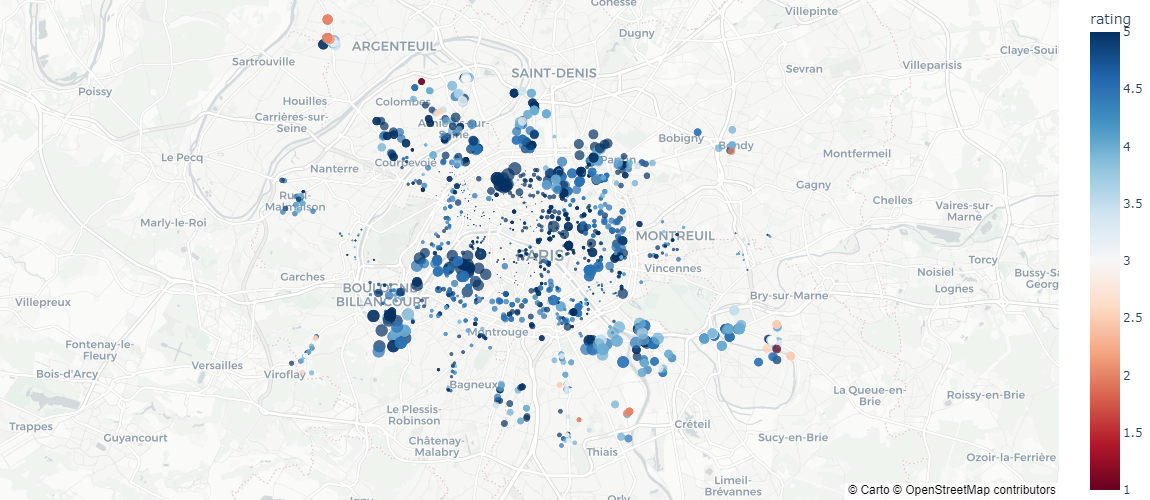

In [14]:
# Draw a mapbox graph as we have geo locations
import plotly.express as px
import plotly.graph_objects as go
df =final_data.copy()
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="category_title", 
                        hover_data=["category_title","station", "review_count",'rating'],
                        color="rating",
                        color_continuous_scale='RdBu',
                        size="no_of_bikes",
                        size_max=10,
                        zoom=10, 
                        height=500,
                        width=1000)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Save image
fig.write_image("../images/final_data.png")
fig.show()

***Note:*** Outcomes of this graph:
- Paris city contains so many stations that could provide bikes to the bikers as bubbles are tightly stacked.
- Most of the stations or we can say categories like(bar, resturants) having high rating.
- The bubble size of the highly rated stations is comparatively big,that means the chances of getting the more no of bikes from a good rated stations is high.

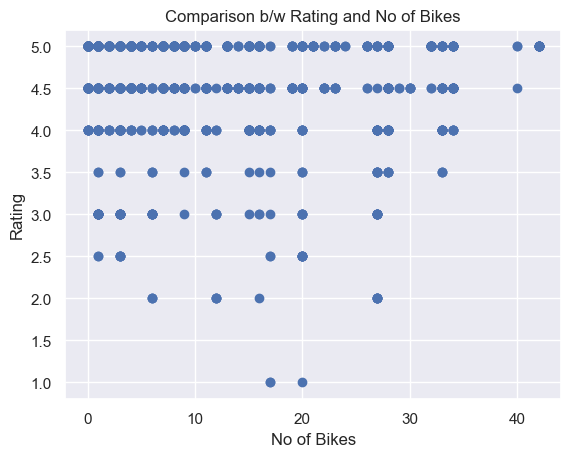

In [45]:
# Lets explore the relation between Rating and no of bikes using scatter plot
x=final_data['no_of_bikes']
y=final_data['rating']
plt.scatter(x,y)
plt.xlabel('No of Bikes')
plt.ylabel('Rating')
plt.title('Comparison b/w Rating and No of Bikes')
plt.show()

***Note:*** The Relation is not much linear but the density of the datapoints shows that at high rated areas cummulative amount of no of bikes is big.

In [ ]:
# Exploring the categories

In [16]:
hist_df=final_data.groupby('category_title').agg({'rating':'mean','category_title':'count'})
hist_df

rating  category_title
category_title                                  
African                 4.666667               6
American (Traditional)  4.583333               6
Amusement Parks         3.500000               2
Arabic                  5.000000               2
Armenian                4.500000               2
...                          ...             ...
Venues & Event Spaces   4.500000               1
Vietnamese              4.634615              26
Whiskey Bars            5.000000               1
Wine Bars               4.741379              29
Wineries                5.000000               2

[155 rows x 2 columns]

In [19]:
hist_df.rename(columns={'category_title': 'count','rating':'mean_rating'},inplace=True)

In [24]:
hist_df.sort_values(by='count',ascending=False)

mean_rating  count
category_title                           
French                    4.566802    247
Italian                   4.636792    106
Bakeries                  4.730392    102
Pizza                     4.505155     97
Japanese                  4.381944     72
...                            ...    ...
Baby Gear & Furniture     4.500000      1
Auvergnat                 5.000000      1
Scandinavian              5.000000      1
Mauritius                 5.000000      1
Donairs                   5.000000      1

[155 rows x 2 columns]

In [43]:
#We consider categories having count greater that one because we are considering highly dense categories only
temp_hist=hist_df[hist_df['count']>20]
temp_hist.head()

mean_rating  count
category_title                        
Bakeries               4.730392    102
Bars                   4.418919     37
Bistros                4.613636     44
Breakfast & Brunch     4.695652     23
Burgers                4.338710     31

<AxesSubplot:ylabel='category_title'>

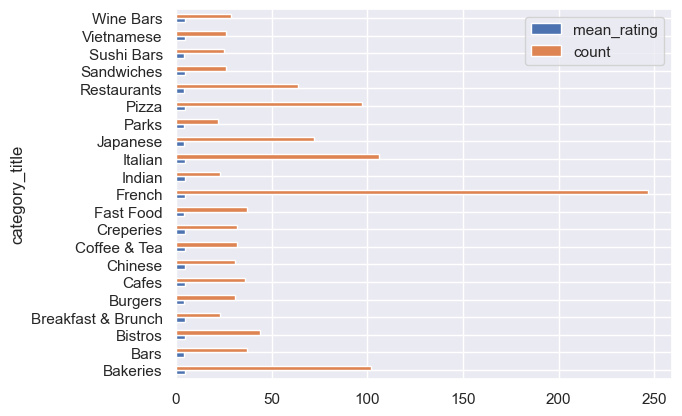

In [48]:
# category bar plot
temp_hist.plot.barh() #horizontal bar

***Note:*** Graph depicts that the categories like (French,Italian,Bakeries have maximum density among other categories) and regardless of the density the average rating of all these categories are same

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [49]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):# function to execute the queries
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        


In [50]:
connection = create_connection("../data/sql_places_db.sqlite") #create a database named sql_places_db and make a connection with it 

Connection to SQLite DB successful


In [ ]:
# creating the database tables having same schema as that of corresponding dataset 

***Networks***

In [51]:
networks.columns

Index(['network_id', 'network_name', 'city', 'country', 'ebikes'], dtype='object')

In [54]:
create_networks_table = """

CREATE TABLE IF NOT EXISTS sql_networks(
  pid INTEGER PRIMARY KEY AUTOINCREMENT, 
  network_id TEXT, 
  network_name TEXT, 
  city TEXT, 
  country TEXT, 
  ebikes INT
);
"""
execute_query(connection, create_networks_table)


Query executed successfully


In [55]:
networks.to_sql('sql_networks', connection, if_exists='append', index = False)# insert the DataFrame values in sqlite table

590

In [56]:
network_sql=pd.read_sql('select * from sql_networks',connection)

In [57]:
network_sql

pid           network_id     network_name                     city  \
0      1      velobike-moscow         Velobike                   Moscow   
1      2      baerum-bysykkel         Bysykkel                    Bærum   
2      3     bicincitta-siena       Bicincittà                    Siena   
3      4  cyclopolis-maroussi       Cyclopolis                 Maroussi   
4      5   cyclopolis-nafplio       Cyclopolis                  Nafplio   
..   ...                  ...              ...                      ...   
585  586             albabici         AlbaBici                 Albacete   
586  587          bicialcazar      BiciAlcázar      Alcázar de San Juan   
587  588        tallinja-bike    Tallinja Bike  Valletta - Malta - Gozo   
588  589      tugo-bike-share  Tugo Bike Share               Tucson, AZ   
589  590      nextbike-prerov  nextbike Prerov                   Prerov   

    country  ebikes  
0        RU       0  
1        NO       0  
2        IT       0  
3        GR       0  
4        GR       0  
..      ...     ...  
585      ES       0  
586      ES       0  
587      MT       0  
588      US       0  
589      CZ       0  

[590 rows x 6 columns]

***bike_stations***

In [58]:
bike_stations.columns

Index(['station_id', 'station', 'latitude', 'longitude', 'no_of_bikes',
       'network_id'],
      dtype='object')

In [61]:
create_stations_table = """
CREATE TABLE IF NOT EXISTS sql_stations(
  sid INTEGER PRIMARY KEY AUTOINCREMENT, 
  station_id TEXT,
  station TEXT, 
  latitude FLOAT, 
  longitude FLOAT, 
  no_of_bikes INT, 
  network_id TEXT
);
"""
execute_query(connection, create_stations_table)

Query executed successfully


In [62]:
bike_stations.to_sql('sql_stations', connection, if_exists='append', index = False)

1459

In [63]:
stations_sql=pd.read_sql('select * from sql_stations',connection)
stations_sql.head()

sid                        station_id                             station  \
0    1  78ec9186acd18a0b30bd3156d24b9f8d       Benjamin Godard - Victor Hugo   
1    2  43c856353b954711f2bbee185a1f9d04  André Mazet - Saint-André des Arts   
2    3  9b2700f3b19beb1dd9df2fd6a013789f     Faubourg Du Temple - Republique   
3    4  80778031e1a033712bfc3a27a190d5dd              Beaux-Arts - Bonaparte   
4    5  f8f9ec30d28856f9b7fad103be9e4674                  Toudouze - Clauzel   

    latitude  longitude  no_of_bikes network_id  
0  48.865983   2.275725            1      velib  
1  48.853756   2.339096            2      velib  
2  48.867872   2.364898            5      velib  
3  48.856452   2.334852            1      velib  
4  48.879296   2.337360            0      velib

***yelp_category***

In [64]:
yelp_category.columns

Index(['category_alias', 'category_title', 'id'], dtype='object')

In [66]:
create_category_table = """
CREATE TABLE IF NOT EXISTS sql_yelp_category_tbl(
  cid INTEGER PRIMARY KEY AUTOINCREMENT, 
  category_alias TEXT,
  category_title TEXT, 
  id TEXT
);
"""
execute_query(connection, create_category_table)

Query executed successfully


In [67]:
yelp_category.to_sql('sql_yelp_category_tbl', connection, if_exists='append', index = False)

1702

In [68]:
category_sql=pd.read_sql('select * from sql_yelp_category_tbl',connection)
category_sql.head()

cid    category_alias      category_title                      id
0    1           museums             Museums  JNbPJxM07pzJ-6JiXkZu6g
1    2          arttours           Art Tours  JNbPJxM07pzJ-6JiXkZu6g
2    3           fashion             Fashion  JNbPJxM07pzJ-6JiXkZu6g
3    4          bakeries            Bakeries  3zZOFdwxA_JDcAKEKomknA
4    5  breakfast_brunch  Breakfast & Brunch  3zZOFdwxA_JDcAKEKomknA

***Yelp_places***

In [69]:
yelp_places.columns

Index(['id', 'name', 'review_count', 'rating', 'latitude', 'longitude',
       'price', 'station'],
      dtype='object')

In [71]:
create_places_table = """
CREATE TABLE IF NOT EXISTS sql_yelp_places_tbl(
  yid INTEGER PRIMARY KEY AUTOINCREMENT, 
  id TEXT,
  name TEXT,
  review_count FLOAT,
  rating FLOAT,
  latitude TEXT,
  longitude TEXT,
  station TEXT,
  price TEXT
);
"""
execute_query(connection, create_places_table)

Query executed successfully


In [72]:
yelp_places.to_sql('sql_yelp_places_tbl', connection, if_exists='append', index = False)

1176

In [73]:
places_sql=pd.read_sql('select * from sql_yelp_places_tbl',connection)
places_sql.head()

yid                      id             name  review_count  rating  \
0    1  JNbPJxM07pzJ-6JiXkZu6g  La Galerie Dior           9.0     5.0   
1    2  3zZOFdwxA_JDcAKEKomknA     Merci Jérôme           5.0     5.0   
2    3  pjuZB_Qf-bFzvLDiEqApjA            Helen           5.0     5.0   
3    4  zpRDPVf_Izk5B7foS9yd8Q       Le Colisée           6.0     5.0   
4    5  7bHtpYzGmCrvvXGWmnszNQ   La Cour Jardin           5.0     5.0   

          latitude         longitude            station price  
0         48.86653           2.30697  Boétie - Ponthieu     0  
1       48.8777597          2.298876  Boétie - Ponthieu     0  
2       48.8750916           2.30406  Boétie - Ponthieu  €€€€  
3         48.87079          2.308084  Boétie - Ponthieu     0  
4  48.866496192705  2.30420208427494  Boétie - Ponthieu     0

***Note:*** We have created four tables in our DB.Followings are the some of in-sites of our database
- tables are connected like: 
- sql_networks(network_id)->sql_stations(station)->sql_yelp_places_tbl(id)->sql_yelp_category_tbl
- We have inserted out oun primary key in each table beacause columns in most of the dataframe could satisfy the primary key constraint

***Look at the data before and after the join to validate your data.***

In [76]:
#check the info summary of all the datasets

In [78]:
networks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   network_id    590 non-null    object
 1   network_name  590 non-null    object
 2   city          590 non-null    object
 3   country       590 non-null    object
 4   ebikes        590 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 19.1+ KB


In [79]:
bike_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station_id   1459 non-null   object 
 1   station      1459 non-null   object 
 2   latitude     1459 non-null   float64
 3   longitude    1459 non-null   float64
 4   no_of_bikes  1459 non-null   int64  
 5   network_id   1459 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 68.5+ KB


In [80]:
yelp_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category_alias  1702 non-null   object
 1   category_title  1702 non-null   object
 2   id              1702 non-null   object
dtypes: object(3)
memory usage: 40.0+ KB


In [82]:
yelp_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1176 non-null   object 
 1   name          1176 non-null   object 
 2   review_count  1176 non-null   float64
 3   rating        1176 non-null   float64
 4   latitude      1176 non-null   float64
 5   longitude     1176 non-null   float64
 6   price         1176 non-null   object 
 7   station       1176 non-null   object 
dtypes: float64(4), object(4)
memory usage: 73.6+ KB


***Note:*** there are no missing values in datasets before joining

In [77]:
# lets check after joining
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1702 non-null   object 
 1   name            1702 non-null   object 
 2   review_count    1702 non-null   float64
 3   rating          1702 non-null   float64
 4   latitude        1702 non-null   float64
 5   longitude       1702 non-null   float64
 6   price           1702 non-null   object 
 7   station         1702 non-null   object 
 8   category_alias  1702 non-null   object 
 9   category_title  1702 non-null   object 
 10  no_of_bikes     1702 non-null   int64  
 11  network_id      1702 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 172.9+ KB


***Note:*** There are no any missing and null values in final data

***Note:*** We can also check the datatype of the columns in each dataset

In [83]:
# check the station values in bike_stations and final_data

In [85]:
bike_stations.nunique() #gives the no of unique values

station_id     1459
station        1457
latitude       1459
longitude      1457
no_of_bikes      54
network_id        2
dtype: int64

In [86]:
final_data.nunique()

id                1175
name              1158
review_count        66
rating               8
latitude          1165
longitude         1162
price                5
station            113
category_alias     155
category_title     155
no_of_bikes         31
network_id           1
dtype: int64

***Note:*** 
- The no of unique stations in bike_stations are 1457
- But after join these sticks to 113 only
- that could be due to the API does'nt have information about all the statios

In [87]:
#Lets do the same with categories

In [88]:
yelp_category.nunique()

category_alias     155
category_title     155
id                1175
dtype: int64

***Note:*** the values of category before and after the join. which shows category data is not chopped off after join

In [89]:
# Check yelp_places

In [90]:
yelp_places.nunique()

id              1176
name            1159
review_count      66
rating             8
latitude        1166
longitude       1163
price              5
station          113
dtype: int64

***Note:*** The 'id' which is a ID of the place is almost equal. So the dataset  values after the join are comparale to the same before join